In [1]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("marriage_proposal.csv")

height = df["Height"].to_numpy()
age = df["Age"].to_numpy()
Income = df["Income"].to_numpy()
RomanticGestureScore = df["RomanticGestureScore"].to_numpy()
CommunicationScore   = df["CompatibilityScore"].to_numpy()
DistanceKM  = df["DistanceKM"].to_numpy()
Response  = df["Response"].to_numpy()
AgeCategory  = np.where(df["AgeCategory"].to_numpy() == 'Young', 0, 
                    np.where(df["AgeCategory"].to_numpy() == 'Senior', 1, 
                    np.where(df["AgeCategory"].to_numpy() == 'Middle-aged', 2, -1)))


In [3]:
numEpocas = 100 
q = len(age)               
eta = 0.0001        
m =  7               
N = 16    
N2 = 8
N3 = 4
N4 = 2             
L = 1   

In [4]:
W1 = np.random.random((N, m + 1))
W2 = np.random.random((N2, N + 1))
W3 = np.random.random((N3, N2 + 1))
W4 = np.random.random((N4, N3 + 1))
W5 = np.random.random((L, N4 + 1))
bias = 1
X = np.vstack((height,age,Income,RomanticGestureScore,CommunicationScore,DistanceKM,AgeCategory))
E = np.zeros(q)
Etm = np.zeros(numEpocas) 

In [5]:
def think_Hyperbolic(W,array):
    return np.tanh(W.dot(array))

def think_Relu(W,array):
      return np.maximum(W.dot(array))

def think_sigmoid(W, array):
        return 1 / (1 + exp(-(W.dot(array))))


In [6]:
for i in range(numEpocas):
    for j in range(len(X[0])):

        Xb = np.hstack((bias,X[:,j]))
        o1 = think_Hyperbolic(W1,Xb)
        o1b = np.insert(o1,0,bias)
        o2 = think_Hyperbolic(W2,o1b)
        o2b = np.insert(o2,0,bias)
        o3 = think_Hyperbolic(W3,o2b)
        o3b = np.insert(o3,0,bias)
        o4 = think_Hyperbolic(W4,o3b)
        o4b = np.insert(o4,0,bias)
        Y = think_sigmoid(W5,o4b)

        e = Response[j] - Y
        E[j] = (e.transpose().dot(e))/2

        delta5 = np.diag(e).dot(1 - Y * Y)
        vdelta5 = W5.T.dot(delta5)[1:]  
        delta4 = np.diag(1 - o4 * o4).dot(vdelta5)
        vdelta4 = W4.T.dot(delta4)[1:] 
        delta3 = np.diag(1 - o3 * o3).dot(vdelta4)
        vdelta3 = W3.T.dot(delta3)[1:]  
        delta2 = np.diag(1 - o2 * o2).dot(vdelta3)
        vdelta2 = W2.T.dot(delta2)[1:] 
        delta1 = np.diag(1 - o1 * o1).dot(vdelta2)


        W1 = W1 + eta*(np.outer(delta1, Xb))
        W2 = W2 + eta*(np.outer(delta2, o1b))
        W3 = W3 + eta*(np.outer(delta3, o2b))
        W4 = W4 + eta*(np.outer(delta4, o3b))
        W5 = W5 + eta*(np.outer(delta5, o4b))

    print(i,E)
    Etm[i] = E.mean()



0 [0.00467627 0.00467622 0.40796859 ... 0.40214879 0.00532288 0.00532283]
1 [0.00532277 0.00532272 0.4021465  ... 0.39598368 0.00605878 0.00605871]
2 [0.00605864 0.00605857 0.3959813  ... 0.38950973 0.00688963 0.00688954]
3 [0.00688945 0.00688935 0.38950731 ... 0.38277941 0.00781804 0.00781793]
4 [0.00781781 0.00781769 0.38277697 ... 0.37586409 0.00884245 0.00884231]
5 [0.00884216 0.00884201 0.37586168 ... 0.36885282 0.00995602 0.00995583]
6 [0.00995565 0.00995547 0.36885048 ... 0.36184859 0.01114595 0.01114572]
7 [0.0111455  0.01114527 0.36184639 ... 0.35496227 0.01239355 0.01239327]
8 [0.012393   0.01239272 0.35496027 ... 0.34830464 0.01367509 0.01367476]
9 [0.01367443 0.0136741  0.34830289 ... 0.34197787 0.01496358 0.01496318]
10 [0.01496279 0.0149624  0.34197641 ... 0.33606782 0.0162311  0.01623065]
11 [0.01623019 0.01622974 0.33606668 ... 0.33063845 0.01745137 0.01745085]
12 [0.01745033 0.01744981 0.33063766 ... 0.32572917 0.01860192 0.01860134]
13 [0.01860075 0.01860017 0.3257287

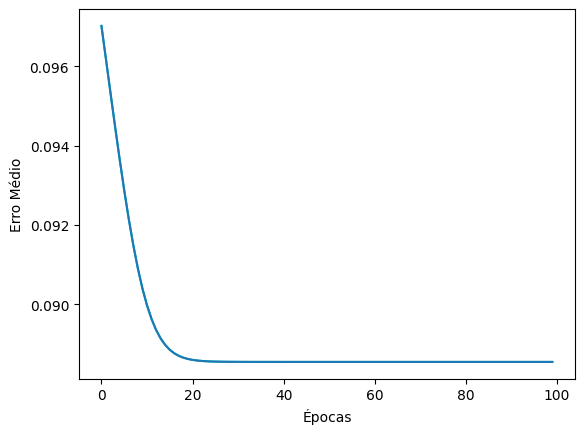

In [7]:
plt.xlabel("Épocas")
plt.ylabel("Erro Médio")
plt.plot(Etm, color='c')
plt.plot(Etm)
plt.show()